# Анализ постов Instagram. Часть 3 – Анализ пересечения хештегов

В качестве набора данных используется датасет, выгруженный в период с апреля по май 2020, по выявленному набору хештегов на тему акции «Бессметрный полк».    

## Анализ пересечения хештегов

На предыдущем шаге мы выделили теги в отдельную колонку `tags`. Далее, сделаем обработку полученного массива и поймем, как выделенные теги пересекаются друг с другом: проведем анализ частотности наличия пары тегов в одном посте.  

In [5]:
import numpy as np
import pandas as pd

In [6]:
filename = 'my_polk_mln'

Для считывания данных создадим вспомогательный атрибут `tag_convertor`, указывающий на способ обработки входящей колонки `tags`.

In [12]:
tag_convertor = {'tags': lambda x: x.strip('[]').replace('\'', '').split(', ') if x and len(x) > 0 else np.nan}

In [14]:
df_ = pd.read_csv(f"../../data/{filename}.csv", engine='python', index_col=0)
# df_ = pd.read_csv(f"../../data/{filename}.csv", engine='python', index_col=0, converters=tag_convertor)

In [16]:
df__ = df_[['owner_id', 'display_url', 'published', 'caption', 'likes_count', 'comments_count', 'is_video', 'tags']]

### Предобработка 
Выделим только те данные, с которыми будем работать, а именно `id`, `tags`. Удалим пустые строки `caption` и `tags`.

In [18]:
df = df__.dropna(subset=['caption', 'tags'])
df = df[['display_url', 'published', 'likes_count', 'comments_count', 'caption', 'tags']]
df.head()

,display_url,published,likes_count,comments_count,caption,tags
id,,,,,,
2303616061775464820,https://instagram.fhel5-1.fna.fbcdn.net/v/t51....,2020-05-07 06:20:55+00,54,0,Блохин Василий Васильевич 1911г рождения. Проб...,{бесмертныйполк}
2305119399719574714,https://instagram.fhel5-1.fna.fbcdn.net/v/t51....,2020-05-09 08:07:47+00,55,3,"Зайцев Борис Иванович, мой пра-дедушка, участн...",{бесмертныйполк}
2302983163475195567,https://instagram.fhel5-1.fna.fbcdn.net/v/t51....,2020-05-06 09:23:28+00,43,1,Мой дед Вавилин Егор Ильич 02.11.1920 года ро...,"{бесмертныйполк2020,бесмертныйполкпермь}"
2304720892040880707,https://instagram.fhel5-1.fna.fbcdn.net/v/t51....,2020-05-08 18:56:01+00,47,0,"На этом фото два моих прадеда, благодаря котор...","{победа2020,75летпобеды,безмертныйполк}"
2305072350833648291,https://instagram.fhel5-1.fna.fbcdn.net/v/t51....,2020-05-09 06:34:19+00,84,0,Спасибо прадедам и моему дедушке за Победу) за...,"{знатьчтобыпомнили,знатьчтобыжить,безмертныйпо..."


In [39]:
df.tags = df.tags.apply(lambda x: x.strip('{}').replace('\'', '').split(',') if len(x) > 0 else np.nan)

In [40]:
df.head()

,display_url,published,likes_count,comments_count,caption,tags
id,,,,,,
2303616061775464820,https://instagram.fhel5-1.fna.fbcdn.net/v/t51....,2020-05-07 06:20:55+00,54,0,Блохин Василий Васильевич 1911г рождения. Проб...,[бесмертныйполк]
2305119399719574714,https://instagram.fhel5-1.fna.fbcdn.net/v/t51....,2020-05-09 08:07:47+00,55,3,"Зайцев Борис Иванович, мой пра-дедушка, участн...",[бесмертныйполк]
2302983163475195567,https://instagram.fhel5-1.fna.fbcdn.net/v/t51....,2020-05-06 09:23:28+00,43,1,Мой дед Вавилин Егор Ильич 02.11.1920 года ро...,"[бесмертныйполк2020, бесмертныйполкпермь]"
2304720892040880707,https://instagram.fhel5-1.fna.fbcdn.net/v/t51....,2020-05-08 18:56:01+00,47,0,"На этом фото два моих прадеда, благодаря котор...","[победа2020, 75летпобеды, безмертныйполк]"
2305072350833648291,https://instagram.fhel5-1.fna.fbcdn.net/v/t51....,2020-05-09 06:34:19+00,84,0,Спасибо прадедам и моему дедушке за Победу) за...,"[знатьчтобыпомнили, знатьчтобыжить, безмертный..."


Соберем все теги в один список `flattened_tags_df` и эмпирически подберем минимальное число упоминаний тегов, тем самым выберем самые популярные среди них.

In [41]:
flattened_tags = pd.Series([tag for tag_list in df.tags for tag in tag_list])

In [42]:
flattened_tags_counts = flattened_tags.value_counts()

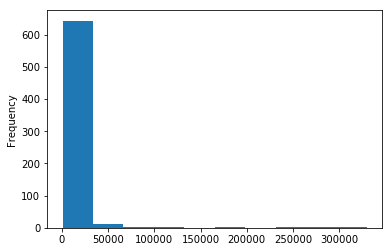

In [43]:
flattened_tags_counts.loc[flattened_tags_counts > 1000].plot(kind='hist')

Отсечение в > 1000 упоминаний не подходит, так как таких тегов много (больше 100). 

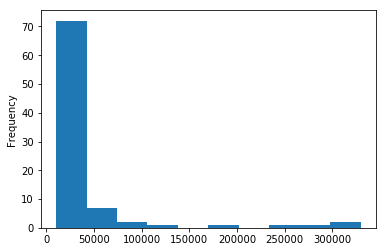

In [46]:
flattened_tags_counts.loc[flattened_tags_counts > 10000].plot(kind='hist')

10000 – выглядит более оптимальным числом, так как дает на выходе около 50 тегов. Создадим переменную `min_count` со значением 10000.

In [47]:
min_count = 10000

In [48]:
top_tags_set = set(flattened_tags_counts.loc[flattened_tags_counts > min_count].index)

In [49]:
len(top_tags_set)

87

87 – количество тегов, упоминаемых более 10000 раз.

In [50]:
top_tags_set

{'1941',
 '1945',
 '75летвеликойпобеды',
 '75летиепобеды',
 '75летпобеды',
 '9',
 '9мая',
 '9мая1945',
 '9мая2019',
 '9мая2020',
 '9маяденьпобеды',
 'polk',
 'repost',
 'russia',
 'victoryday',
 'армия',
 'бесмертныйполк',
 'бессмертныи',
 'бессмертный',
 'бессмертныйполк',
 'бессмертныйполк2020',
 'бессмертныйполкдома',
 'бессмертныйполконлайн',
 'бессмертныйполкроссии',
 'бессмертныйполктатарстан',
 'великаяотечественнаявойна',
 'великаяпобеда',
 'весна',
 'ветераны',
 'вечнаяпамять',
 'вместегордимся',
 'вов',
 'военныепесни',
 'война',
 'волонтерыпобеды',
 'георгиевскаялента',
 'георгиевскаяленточка',
 'годпамятииславы',
 'гордимся',
 'гордостьроссии',
 'деньпобеды',
 'деньпобеды2019',
 'деньпобеды2020',
 'знатьчтобыпомнить',
 'май',
 'мир',
 'москва',
 'мывместе',
 'мывсеравноскажемспасибо',
 'мыгордимся',
 'мыпомним',
 'мыпомниммыгордимся',
 'наследникипобеды',
 'нашапобеда',
 'никогданезабуду',
 'никтонезабыт',
 'никтонезабытничтонезабыто',
 'окна_победы',
 'окнапобеды',
 'памят

In [51]:
# В множество тегов попали такие слова, как: `#ауе`, `#ауежизньворам`, `#базарунет`, `#бандит` и другие «блатные» понятия. Пока что оставим их, посмотрим как они коррелируют с тематическими тегами. 

В рабочий датасет `df` добавим колонку `top_tags`, в которой укажем теги из множества `top_tags_set` для каждого поста.

In [52]:
df['top_tags'] = df.tags.apply(lambda x: [tag for tag in x if tag in top_tags_set]); df.head()

,display_url,published,likes_count,comments_count,caption,tags,top_tags
id,,,,,,,
2303616061775464820,https://instagram.fhel5-1.fna.fbcdn.net/v/t51....,2020-05-07 06:20:55+00,54,0,Блохин Василий Васильевич 1911г рождения. Проб...,[бесмертныйполк],[бесмертныйполк]
2305119399719574714,https://instagram.fhel5-1.fna.fbcdn.net/v/t51....,2020-05-09 08:07:47+00,55,3,"Зайцев Борис Иванович, мой пра-дедушка, участн...",[бесмертныйполк],[бесмертныйполк]
2302983163475195567,https://instagram.fhel5-1.fna.fbcdn.net/v/t51....,2020-05-06 09:23:28+00,43,1,Мой дед Вавилин Егор Ильич 02.11.1920 года ро...,"[бесмертныйполк2020, бесмертныйполкпермь]",[]
2304720892040880707,https://instagram.fhel5-1.fna.fbcdn.net/v/t51....,2020-05-08 18:56:01+00,47,0,"На этом фото два моих прадеда, благодаря котор...","[победа2020, 75летпобеды, безмертныйполк]",[75летпобеды]
2305072350833648291,https://instagram.fhel5-1.fna.fbcdn.net/v/t51....,2020-05-09 06:34:19+00,84,0,Спасибо прадедам и моему дедушке за Победу) за...,"[знатьчтобыпомнили, знатьчтобыжить, безмертный...",[]


Выделим только те посты, в которых есть топовые теги.

In [53]:
df_top_tags = df.loc[df.top_tags.apply(lambda x: x !=[])]

In [54]:
df_top_tags.shape[0] / df.shape[0]

0.971251312913674

~97% постов содержат в себе топовые теги.

### Создание матрицы пересечения 
Создадим новый датафрейм `tag_vector_df`, в который запишем топовые теги.

In [55]:
tag_vector_df = df_top_tags.loc[:, ['top_tags']]; tag_vector_df.head()

,top_tags
id,
2303616061775464820,[бесмертныйполк]
2305119399719574714,[бесмертныйполк]
2304720892040880707,[75летпобеды]
2305107864828112422,"[сднемпобеды, 9мая]"
2305320253696999679,"[9мая, деньпобеды]"


Далее, для каждого топового тега создадим колонку в `tag_vector_df` и укажем его наличие в текущем посте.

In [56]:
for tag in sorted(top_tags_set):
    tag_vector_df[f"{tag}"] = tag_vector_df.top_tags.apply(lambda x: bool(tag in x))

In [57]:
tag_vector_df.shape

(971870, 88)

В итоге получится логическая матрица 971870 x 88. Запишем ее в переменную `tag_vector_matrix`.

In [58]:
tag_vector_matrix = tag_vector_df.drop(columns=['top_tags']); tag_vector_matrix.head()

,1941,1945,75летвеликойпобеды,75летиепобеды,75летпобеды,9,9мая,9мая1945,9мая2019,9мая2020,...,спасибо,спасибовам,спасибодедузапобеду,спасибозапобеду,ссср,стихиовойне,шествие,ягоржусь,япомню,япомнюягоржусь
id,,,,,,,,,,,,,,,,,,,,,
2303616061775464820,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2305119399719574714,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2304720892040880707,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2305107864828112422,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2305320253696999679,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


## Визуализация

Для визуализации воспользуемся методом корреляции значений по строчкам/столбам.

In [59]:
corr = tag_vector_matrix.corr(); corr.head()

,1941,1945,75летвеликойпобеды,75летиепобеды,75летпобеды,9,9мая,9мая1945,9мая2019,9мая2020,...,спасибо,спасибовам,спасибодедузапобеду,спасибозапобеду,ссср,стихиовойне,шествие,ягоржусь,япомню,япомнюягоржусь
1941,1.000000,0.778985,-0.010038,-0.011416,-0.034187,0.509873,0.154077,0.645038,0.165762,0.031980,...,0.007409,0.703784,0.200801,-0.001719,0.231997,-0.015320,-0.017772,0.001868,0.003594,0.055918
1945,0.778985,1.000000,-0.010370,-0.009593,-0.030613,0.474415,0.167223,0.595742,0.150407,0.034047,...,0.017545,0.650999,0.196815,0.004670,0.229350,-0.016105,-0.019423,0.010468,0.012578,0.045801
75летвеликойпобеды,-0.010038,-0.010370,1.000000,0.036503,0.010583,-0.007407,-0.015495,-0.010312,-0.011754,0.029921,...,-0.002826,-0.010887,-0.005694,0.009697,-0.001237,0.013483,-0.015163,0.000543,0.001125,0.003269
75летиепобеды,-0.011416,-0.009593,0.036503,1.000000,0.031195,-0.005883,-0.002230,-0.009409,-0.012053,0.039677,...,-0.006440,-0.011485,-0.018025,0.056975,-0.007559,0.031184,-0.015692,0.014168,0.015081,0.033048
75летпобеды,-0.034187,-0.030613,0.010583,0.031195,1.000000,-0.037517,0.003691,-0.035411,-0.046159,0.099507,...,-0.011324,-0.035594,-0.069116,0.111041,-0.029106,0.042237,-0.067960,-0.000661,-0.002718,0.082956


In [60]:
import matplotlib.pyplot as plt 
import seaborn as sns

In [61]:
l = 16

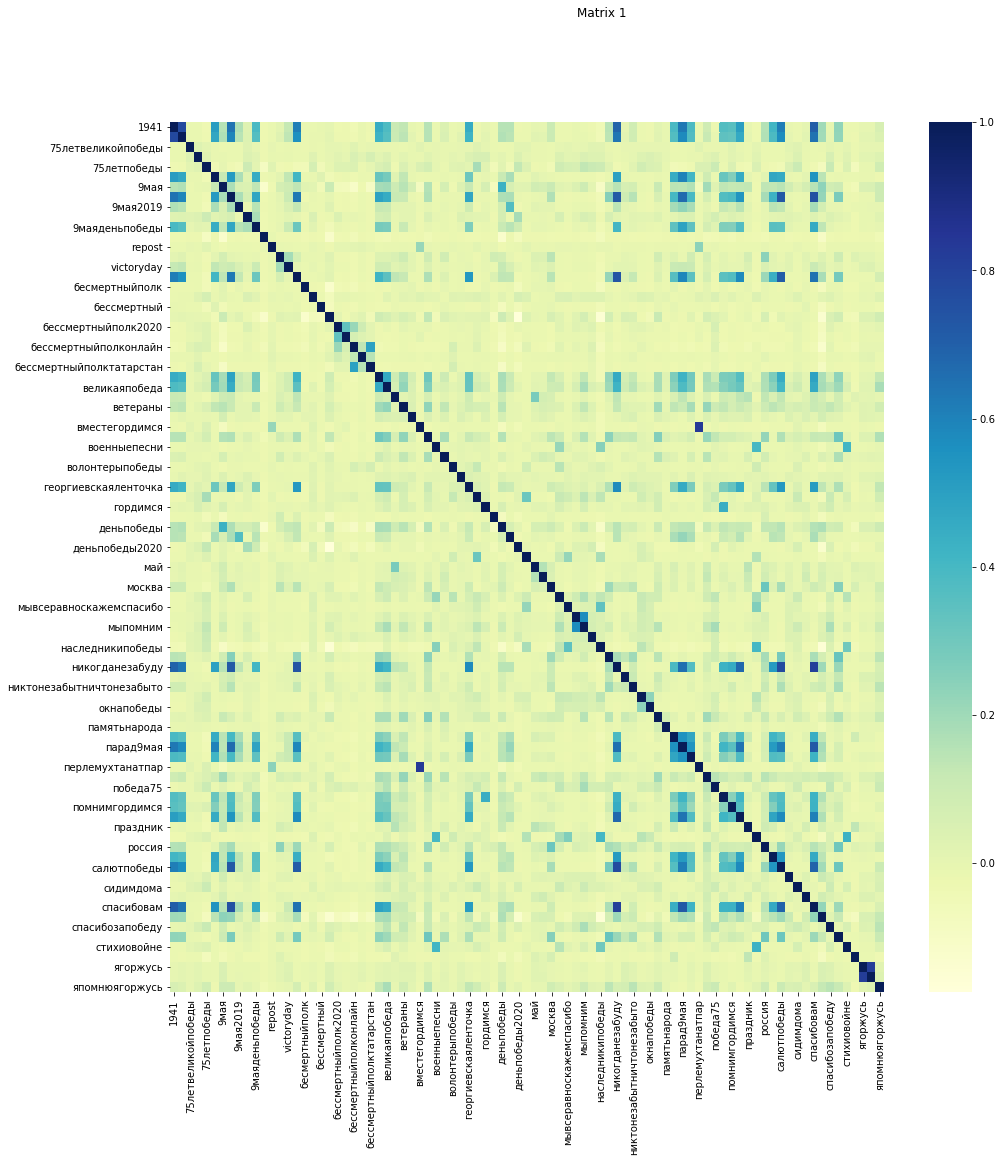

In [62]:
plt.figure(figsize=(l, l))
plt.suptitle('Matrix 1')

sns.heatmap(corr, cmap='YlGnBu')

# Анализ постов Instagram. Часть 4 – Анализ временных рядов

В качестве набора данных используется датасет, выгруженный в период с апреля по май 2020, по выявленному набору хештегов на тему акции «Бессметрный полк».    

In [ ]:
from tqdm import tqdm_notebook

Переведем поле `published` в тип `datetime64`.

In [67]:
df.published = pd.to_datetime(df.published)

## Общее распределение постов

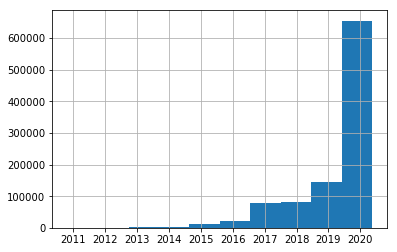

In [189]:
df.published.hist()

## Распределение по месяцам
Май ожидаемо самый активный.

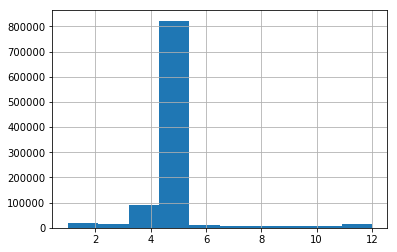

In [190]:
df.published.dt.month.hist()

Можно исключить май, для более получения более точного представления о годовом распределении постов.

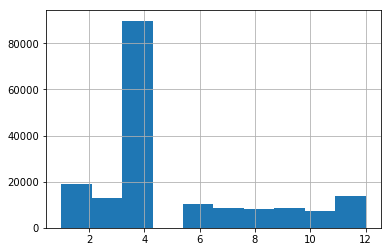

In [191]:
df[df.published.dt.month != 5].published.dt.month.hist()

## Распределение по дням мая
Построим диаграмму распределения постов в зависимости от дня мая (с 1 по 31). 

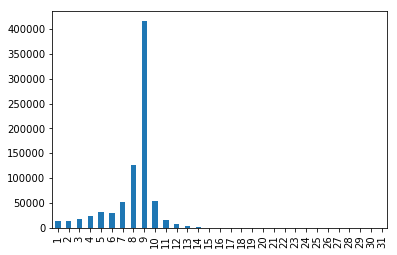

In [192]:
df[df.published.dt.month == 5].published.dt.day.value_counts().sort_index().plot(kind='bar')

## Первое упоминание тега
Для всех популярных тегов найдем дату его первого упоминания. 

In [117]:
flattened_tags_df = pd.DataFrame(flattened_tags_counts, columns=['count'])
flattened_tags_df['first_mention'] = np.nan

sort_df = df.sort_values(by='published', ascending=True, inplace=False)

In [193]:
flattened_tags_df.head()

,count,first_mention
деньпобеды,329698,2013-05-09 00:53:53+00:00
9мая,318154,2013-05-05 09:57:37+00:00
бессмертныйполк,287698,2013-05-09 10:08:38+00:00
спасибодедузапобеду,234897,2013-05-09 14:53:41+00:00
75летпобеды,180856,2015-03-12 08:58:40+00:00


In [194]:
for tag in tqdm_notebook(flattened_tags_df[flattened_tags_df.first_mention.isna()].index):
    flattened_tags_df.at[tag, 'first_mention'] = sort_df[sort_df.tags.apply(lambda x: tag in x)].published[0]

KeyboardInterrupt: 

По диаграмме распределения видно, что многие теги были «введены» в 2015 и 2020 году. 

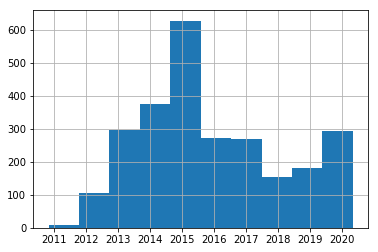

In [197]:
pd.to_datetime(flattened_tags_df.first_mention).hist()

Посмотрим на эти теги самые популярные теги, которые были введены в каждом году, начиная от 2012.

In [201]:
flattened_tags_df[flattened_tags_df.first_mention.dt.year == 2012]

,count,first_mention
москва,25098,2012-09-15 19:20:46+00:00
шествие,20312,2012-02-04 09:47:55+00:00
repost,18943,2012-12-13 02:50:50+00:00
бессмертный,18493,2012-10-29 13:11:38+00:00
гордостьроссии,11817,2012-05-06 01:58:07+00:00
lakeland,6738,2012-06-03 05:07:45+00:00
florida,5365,2012-04-22 03:58:34+00:00
tampa,3944,2012-09-14 04:40:23+00:00
polkcounty,3638,2012-02-04 04:03:33+00:00
orlando,3562,2012-07-17 14:52:07+00:00
